# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [6]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

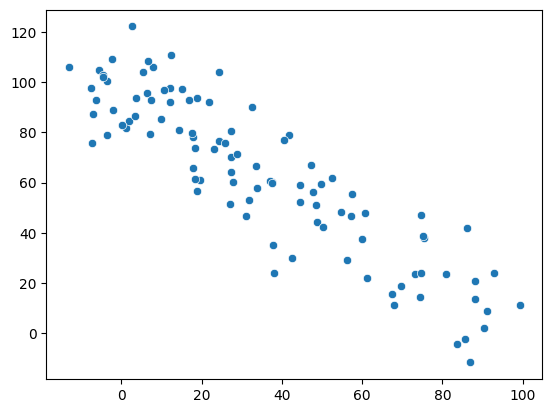

In [7]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [8]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

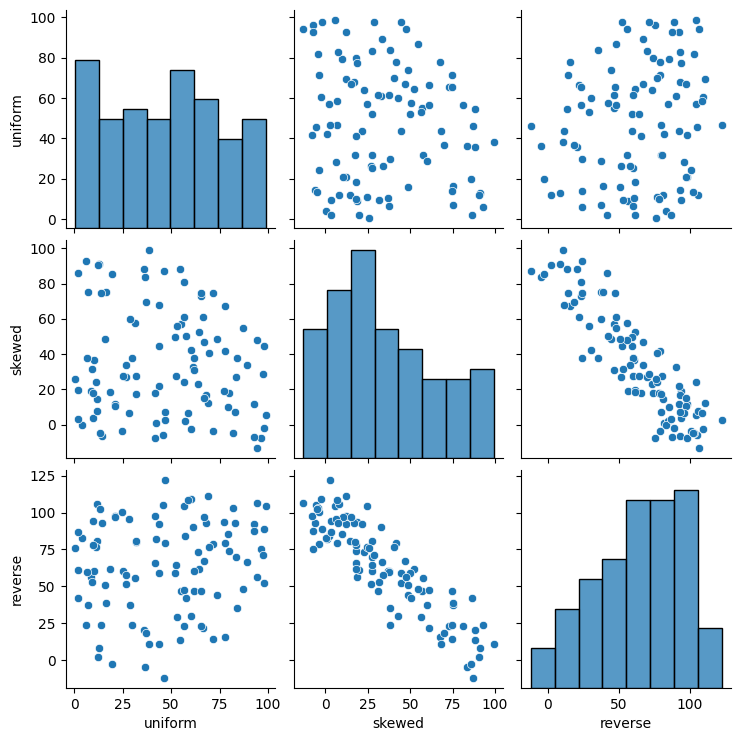

In [9]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [10]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [29]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/var/folders/jd/m5rddfd130g9hglskx9n1b140000gn/T/ipykernel_89550/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

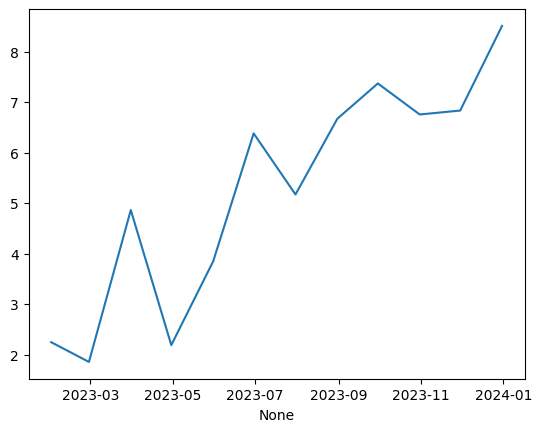

In [12]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

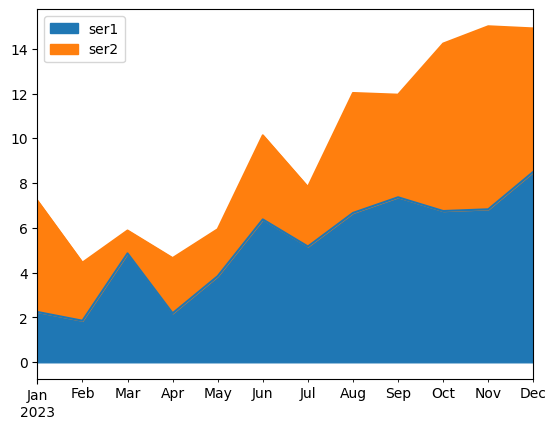

In [13]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

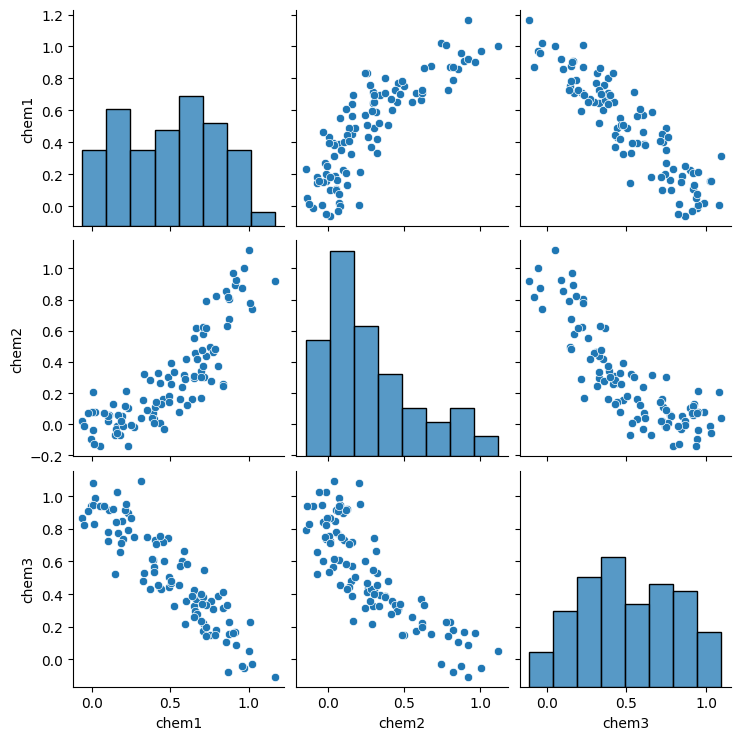

In [15]:
sns.pairplot(df_chem)

Choice of 3 out of 9 plots:

Scatter plot of chem1 vs chem2
    This relationship appears non-linear (parabolic) due to the squaring in chem2, clearly chem2 increases as chem1 increases
Scatter plot of chem1 vs chem3
    Since chem3 is generated as an inverse of base_data (1 - base_data), this will likely show a negative linear relationship. Here chem3 decreases as chem1 increases.
Scatter plot of chem2 vs chem3
    This plot will show how chemical B and C relate having inverse relationship.

Making graph clearer and informative

I will add axis labels and units to make each chemicals represent clearer

Add curve fit to non-linear relationships (eg: chem1 vs chem2) to capture the shape of relationship

Use color coding to differentiate overlapping points.



chem1 vs chem3: Yes, a linear regression line because the relationship is close to linear.
chem1 vs chem2: is based on the square of base_data, not a straight line, but a quadratic or non-linear curve fit because chem2 .
chem2 vs chem3: Possibly a curve fit to explore the relationship

If I had to choose one, I would pick chem1 vs chem3 as it shows strong and linear negative linear relationship making it more informative.

If I had to choose all 6, I will choose the 3 scatter plots (chem1 vs chem2, chem1 vs chem3, chem2 vs chem3)
3 histograms of individual distributions of chem1, chem2, chem3 to understand how each chemical is distributed.

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

In [ ]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

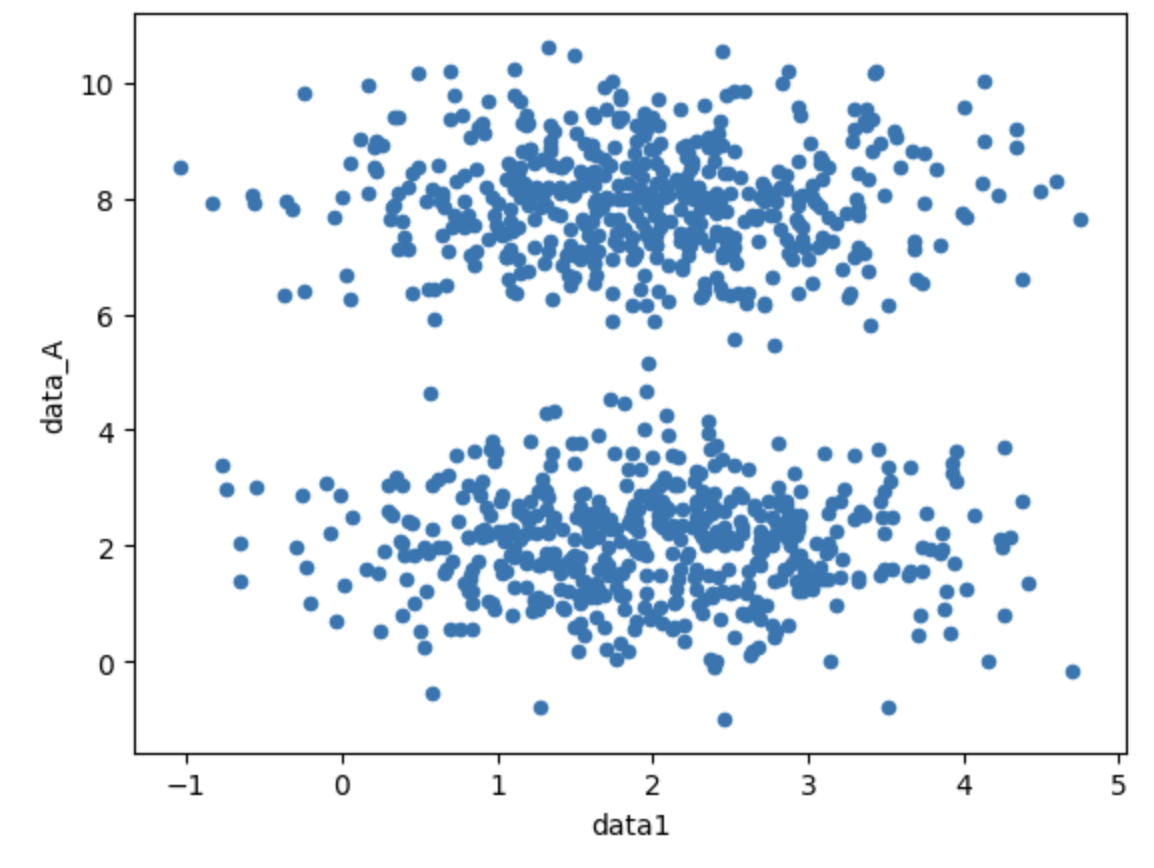

In [1]:
from IPython.display import Image
Image("twoclouds.png")

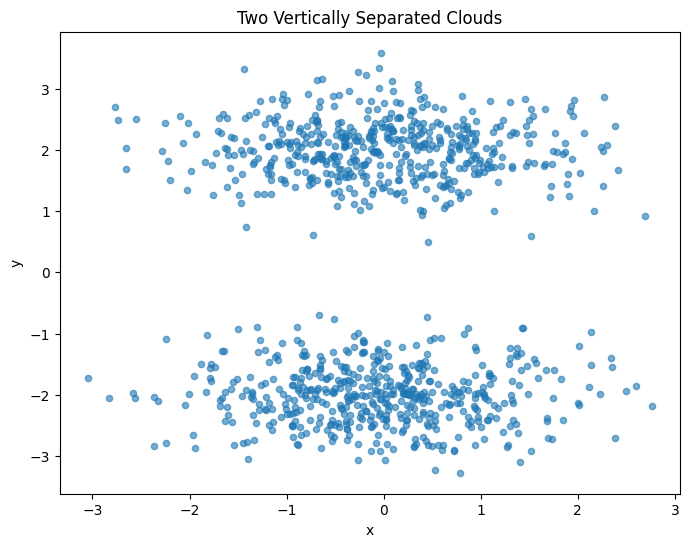

In [19]:
# Set random seed for reproducibility
np.random.seed(0)

# Number of points in each cloud
num_points = 500

# X values: normal distribution, same for both clouds
x_values = np.concatenate([
    np.random.normal(loc=0, scale=1, size=num_points),  
    np.random.normal(loc=0, scale=1, size=num_points) 
])

# Y values: different means for vertical separation
y_values = np.concatenate([
    np.random.normal(loc=2, scale=0.5, size=num_points),  # Cloud 1 (centered at 2)
    np.random.normal(loc=-2, scale=0.5, size=num_points)  # Cloud 2 (centered at -2)
])


df_twoclouds = pd.DataFrame({"x": x_values, "y": y_values})

# Plot
df_twoclouds.plot.scatter(x='x', y='y', alpha=0.6, figsize=(8,6), title='Two Vertically Separated Clouds')
plt.show()

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

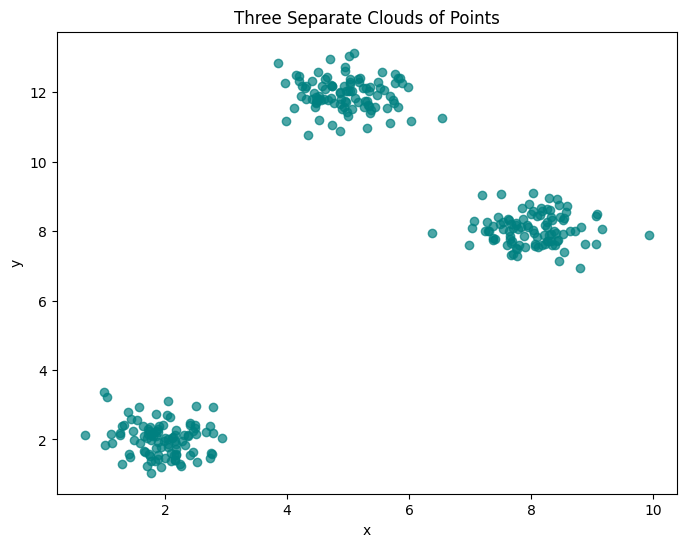

In [ ]:
np.random.seed(42)  # For reproducibility

# First cloud: Bottom left
x1 = np.random.normal(loc=2, scale=0.5, size=100)
y1 = np.random.normal(loc=2, scale=0.5, size=100)

# Second cloud: center right
x2 = np.random.normal(loc=8, scale=0.5, size=100)
y2 = np.random.normal(loc=8, scale=0.5, size=100)

# Third cloud: Center top
x3 = np.random.normal(loc=5, scale=0.5, size=100)
y3 = np.random.normal(loc=12, scale=0.5, size=100)

# Combine all clouds
x_full = np.concatenate([x1, x2, x3])
y_full = np.concatenate([y1, y2, y3])


df_clouds = pd.DataFrame({'x': x_full, 'y': y_full})

# Scatter plot of the three clouds
plt.figure(figsize=(8, 6))
plt.scatter(df_clouds['x'], df_clouds['y'], alpha=0.7, color='teal')
plt.title("Three Separate Clouds of Points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


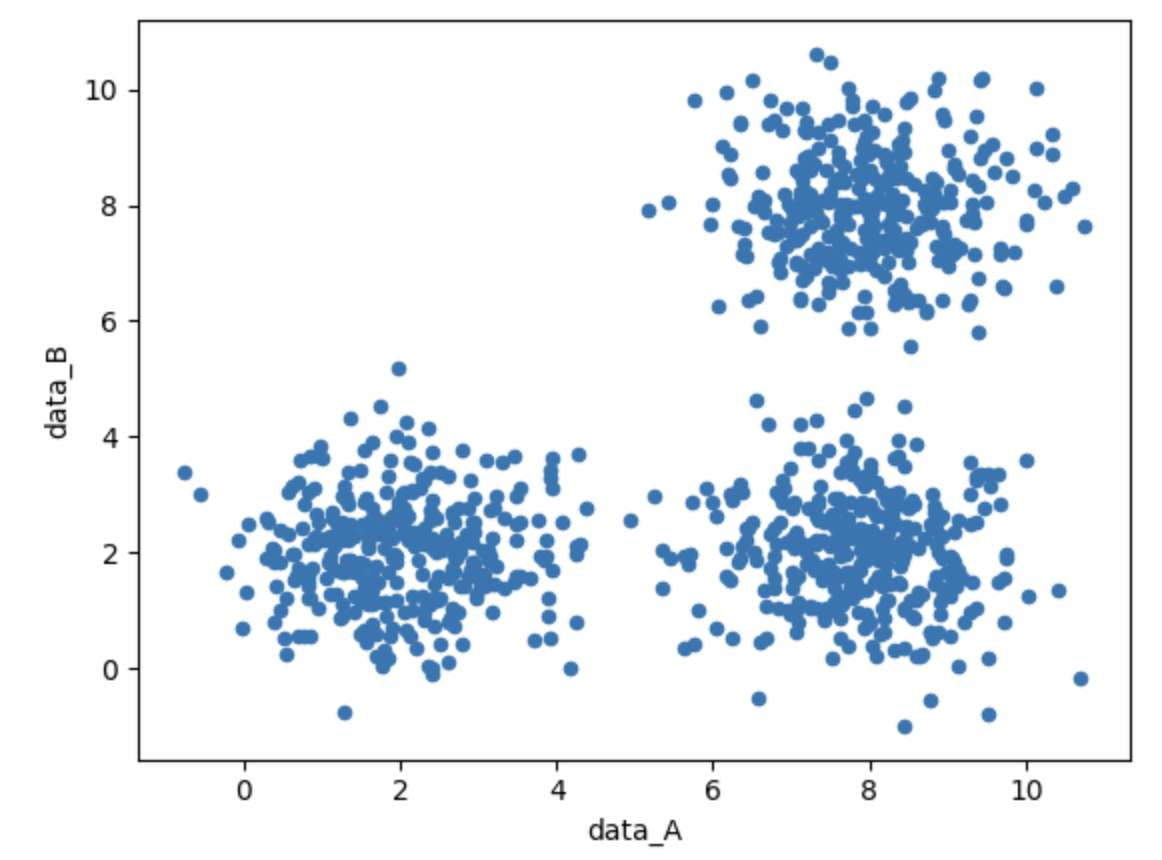

In [2]:
from IPython.display import Image
Image("threeclouds.png")

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

In [23]:
df_clouds.corr()

,x,y
x,1.000000,0.583438
y,0.583438,1.000000


Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

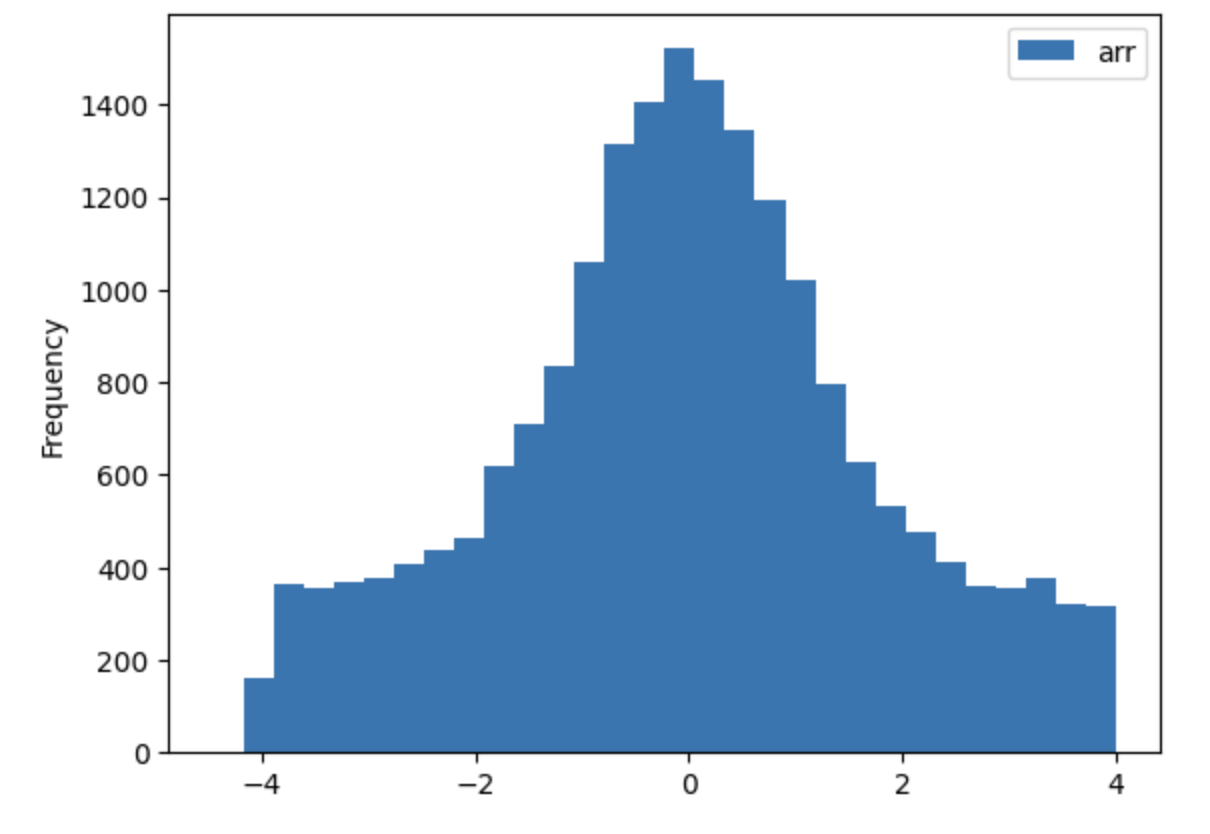

In [3]:
from IPython.display import Image
Image("histogram.png")

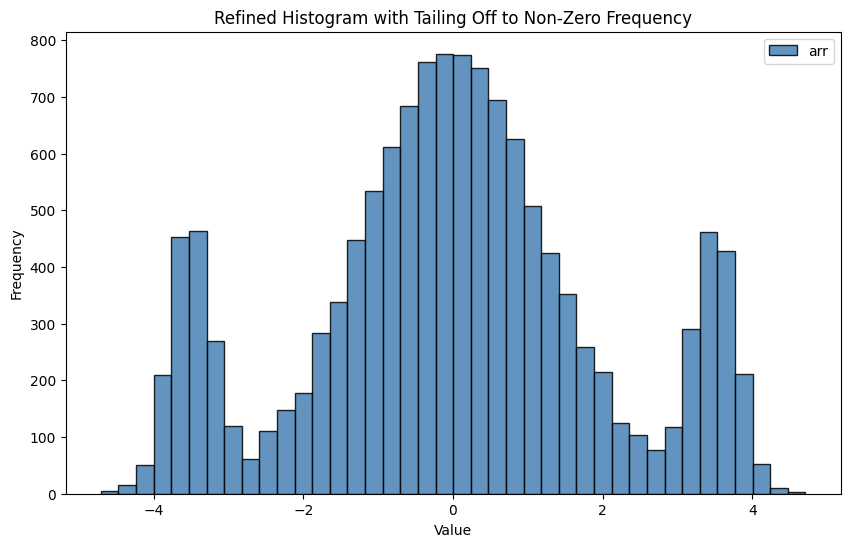

In [25]:


np.random.seed(42)  # For reproducibility

# Step 1: Normal distribution for center, tighter spread
normal_center = np.random.normal(loc=0, scale=1.2, size=10000)  # main bell curve, peak ~1400-1500

# Step 2: Left tail (extra points to boost tail frequencies)
left_tail = np.random.normal(loc=-3.5, scale=0.3, size=1500)  # concentrated in the left tail

# Step 3: Right tail (extra points to boost right tail frequencies)
right_tail = np.random.normal(loc=3.5, scale=0.3, size=1500)  # concentrated in the right tail

# Combine all data
final_data = np.concatenate([normal_center, left_tail, right_tail])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(final_data, bins=40, label='arr', alpha=0.85, color='steelblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Refined Histogram with Tailing Off to Non-Zero Frequency')
plt.legend()
plt.show()


Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

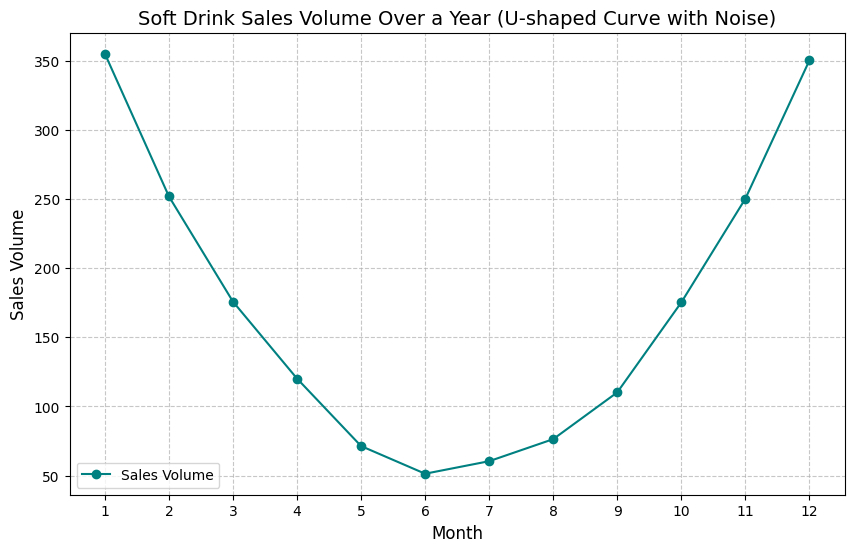

In [26]:

# Set seed for reproducibility
np.random.seed(42)

# Create months
months = np.arange(1, 13)  # Months 1 to 12

# U-shaped sales trend using quadratic curve + noise
# Example: a simple parabola that dips in the middle of the year
sales_trend = (months - 6.5)**2  # Makes U-shape with lowest point in mid-year

# Scale and shift to look like realistic sales data, and add noise
sales_volume = 50 + (sales_trend * 10) + np.random.normal(0, 5, size=12)  # 50 baseline + scaled U-shape + noise

# Create DataFrame for plotting
df_sales = pd.DataFrame({'Month': months, 'Sales': sales_volume})

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_sales['Month'], df_sales['Sales'], marker='o', linestyle='-', color='teal', label='Sales Volume')
plt.title('Soft Drink Sales Volume Over a Year (U-shaped Curve with Noise)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

<Figure size 1200x600 with 0 Axes>

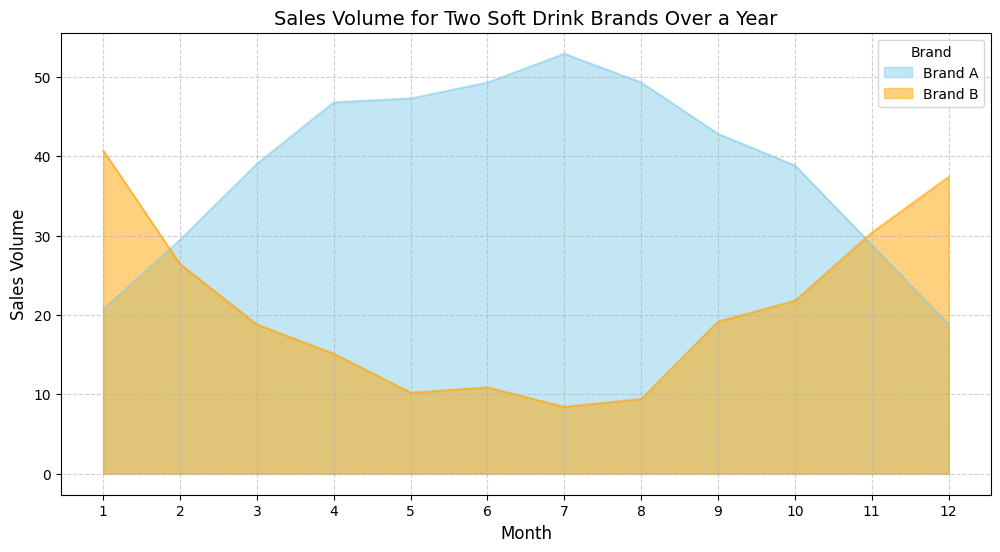

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create months
months = np.arange(1, 13)  # 12 months

# Brand A: Increasing then decreasing (upside-down U shape) + some noise
brand_a = -1 * (months - 6.5)**2 + 50 + np.random.normal(0, 2, size=12)
brand_a = np.clip(brand_a, a_min=0, a_max=None)  # Clip negative sales to zero

# Brand B: Decreasing then increasing (U shape) + some noise
brand_b = (months - 6.5)**2 + 10 + np.random.normal(0, 2, size=12)

# Create DataFrame
df_sales = pd.DataFrame({
    'Month': months,
    'Brand A': brand_a,
    'Brand B': brand_b
})

# Set 'Month' as index for plotting
df_sales.set_index('Month', inplace=True)

# Plot area chart
plt.figure(figsize=(12, 6))
df_sales.plot(kind='area', stacked=False, alpha=0.5, figsize=(12, 6), color=['skyblue', 'orange'])

# Formatting
plt.title('Sales Volume for Two Soft Drink Brands Over a Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.xticks(months)
plt.legend(title='Brand')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

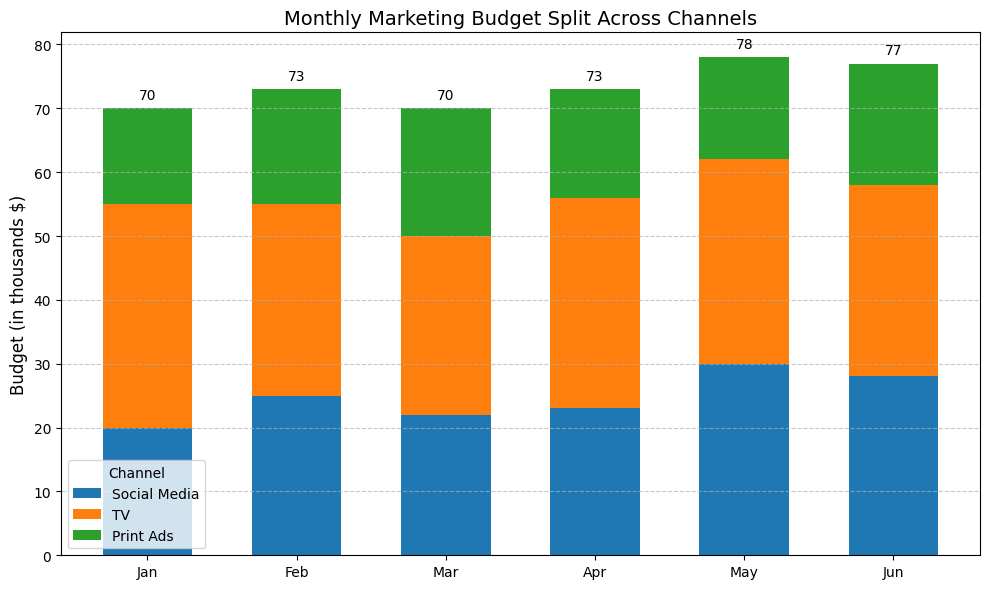

In [ ]:
# Example data: Budget in thousands
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
social_media = np.array([20, 25, 22, 23, 30, 28])
tv = np.array([35, 30, 28, 33, 32, 30])
print_ads = np.array([15, 18, 20, 17, 16, 19])

# Bar width
bar_width = 0.6


fig, ax = plt.subplots(figsize=(10, 6))

# First layer
ax.bar(months, social_media, bar_width, label='Social Media', color='#1f77b4')

# Second layer stacked on top of first
ax.bar(months, tv, bar_width, bottom=social_media, label='TV', color='#ff7f0e')

# Third layer stacked on top of first + second
ax.bar(months, print_ads, bar_width, bottom=social_media + tv, label='Print Ads', color='#2ca02c')


ax.set_ylabel('Budget (in thousands $)', fontsize=12)
ax.set_title('Monthly Marketing Budget Split Across Channels', fontsize=14)
ax.legend(title='Channel')


totals = social_media + tv + print_ads
for i, total in enumerate(totals):
    ax.text(i, total + 1, f'{total}', ha='center', va='bottom', fontsize=10)


ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
